##**Problem #1**

Using the Wallis product for approximating PI, This chunk of code will compute the necessary amount of terms to reach a desired level of approximation. The code matches the approximation of PI to the real value of PI to a desired decimal point of accuracy.

In [ ]:
import math

def truncate(num,n):
  # Converts the number into a stirng
  temp = str(num)
  # Loops through string to find decimal places
  for i in range(len(temp)):
    if temp[i] == '.':
      try:
        # Returns all values before nth+1 decimal place
        return float(temp[:i+n+1])
      except:
        # Else the nth decimal does not exist
        return float(temp)
  return float(temp)

# Set to loop over the first 6 digits
for x in range(1, 6):
  # Initilizes the ith element of the product
  i = 1
  # Boolean for while loop termination
  Bool = True
  # Initilizes the product
  product = 1
  while (Bool):
    # Computes product
    product = product*((2*i)/(2*i-1))*((2*i)/(2*i+1))
    # If the truncated product is equivalent to the truncated level of PI then terminate
    if (truncate(2*product,x) == (truncate(math.pi,x))):
      Bool = False
      # Prints the number of terms, error, and approximation
      print("the number of turns is: ", i+1)
      print("the error is: ", abs(truncate(2*product, x)-math.pi))
      print("the approximation is: ", 2*product)
    # If the the product is not approximated to the correct decimal it updates i
    else:
      i = i+1

the number of turns is:  20
the error is:  0.04159265358979303
the approximation is:  3.101577263438269
the number of turns is:  494
the error is:  0.0015926535897929917
the approximation is:  3.1400015712656115
the number of turns is:  1326
the error is:  0.0005926535897931018
the approximation is:  3.14100017974352
the number of turns is:  8478
the error is:  9.265358979293481e-05
the approximation is:  3.141500009935073
the number of turns is:  295977
the error is:  2.6535897932333796e-06
the approximation is:  3.141590000007498


##**Problem#2**

Using gradient descent from class, we initilize a guess, compute the gradient, and move in the opposite direciton of the gradient by a designated step size. When the norm of the gradient is close to zero, the x and y locations are returned and printed. Varying the guess within the 2D range produces different results, some that will converge and other that will not. Depending on the guess, there are different locations where the gradeint is equal to zero and there are also points where the movement of the desecent will bounce back and forth around the minimum of a convex location. By creating a 3d plot you can beter determine where the initial guesses should be by visuals

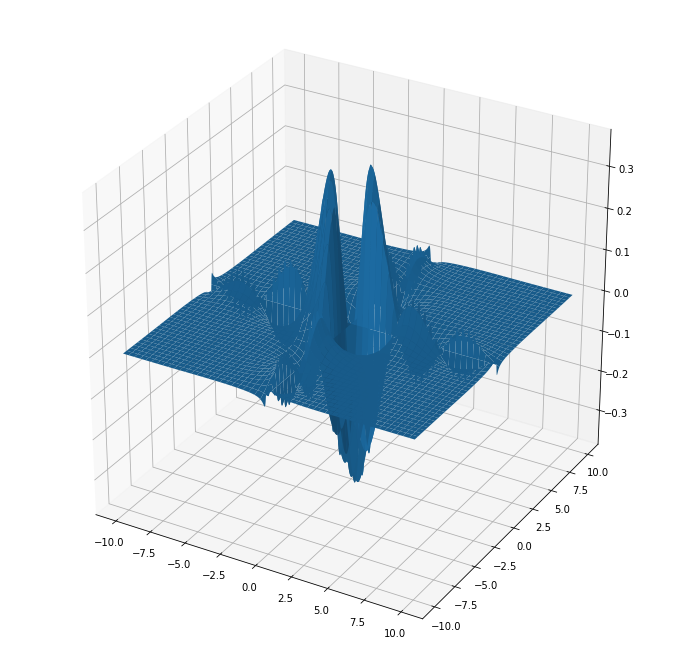

In [1]:
import numpy as np

# Function we are trying to minize
def xyfunc(z):
  return np.sin(z[0])*np.sin(z[1])/(((z[0]*z[1])**2)+1)

#Computes the gradient at a specific (x,y) location
def computeGradient(f, x, h):
  #create a zero vector for the gradient
  n = len(x)
  gradient = np.zeros(n)
    
  #save f(x) so we don't need to compute it so frequently
  fx = f(x)
    
  # approximate the gradient
  for i in range(n):
    xUp = x.copy()
        
    #add h to the ith component of x
    xUp[i] += h
        
    # approximate the ith partial derivative
    gradient[i] = (f(xUp) - fx)/h
            
  return gradient

# Computes Gradient Descent
def gradientDescent(f, x0, alpha, tolerance, maxIterations, h):
  x = x0
  for counter in range(maxIterations):
    gradient = computeGradient(f,x,h)
    if np.linalg.norm(gradient) < tolerance:
      # return the approximate critical value x
      return x
        
        # if we do not converge, print a message
    elif counter == maxIterations-1:
      print("Gradient descent failed")
      print('The gradient is', gradient)
      # return x, sometimes it is still pretty good
      return x

    # take a step in the opposite direction as the gradient
    x -= alpha*gradient

gradientDescent(xyfunc,[-2,-1],0.01,0.0001,1000000,0.001)

import matplotlib.pyplot as plt

a = np.arange(-10,10,0.01)
b = np.arange(-10,10,0.01)
X,Y = np.meshgrid(a,b)
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection="3d")
z = xyfunc([X,Y])
ax.plot_surface(X,Y,z)
plt.show()

##**Problem #3**

Third program reads the lines of text from The Adventures of Sherlock Holmes, process each line so that only words are present and stores every word into a list. This list is then compared to an empty list and will add words that do not exist in the unique list Essentially discovering all unique words used in the text. I kept the '-' symbol because the hyphen causes for different meanings and also kept numbers. Both of these could easily be implemented to remove them but there are some terms like 7s and 12s.

In [ ]:
# Initilizes the list of total words and the list of unique words
wordlist = []
uniquewords = []
# Reads the text file
# !! NEED TO IMPORT THIS FILE INTO GOOGLE COLAB BEFORE USE!!
with open('Book.txt') as f:
  # Creates an array of lines
  lines = f.readlines()
# Loops through lines in the book
for i in lines:
  # Converts all letters to lowercase
  i = i.lower()
  # Loops through each word in a line and Removes and Replaces characters
  for char in i:
    if char in '()?.!/:;,”“£‘—':
      i = i.replace(char,' ')
  # Loops through each word in a line and adds it to the words list
  for k in i.split():
    wordlist.append(k)
# Loops through the words list and checks for unique words
for x in wordlist:
  if not x in uniquewords:
    uniquewords.append(x)
print(len(uniquewords))

8330
104983
['i', 'a', 'scandal', 'in', 'bohemia', 'to', 'sherlock', 'holmes', 'she', 'is', 'always', 'the', 'woman', 'have', 'seldom', 'heard', 'him', 'mention', 'her', 'under', 'any', 'other', 'name', 'his', 'eyes', 'eclipses', 'and', 'predominates', 'whole', 'of', 'sex', 'it', 'was', 'not', 'that', 'he', 'felt', 'emotion', 'akin', 'love', 'for', 'irene', 'adler', 'all', 'emotions', 'one', 'particularly', 'were', 'abhorrent', 'cold', 'precise', 'but', 'admirably', 'balanced', 'mind', 'take', 'most', 'perfect', 'reasoning', 'observing', 'machine', 'world', 'has', 'seen', 'as', 'lover', 'would', 'placed', 'himself', 'false', 'position', 'never', 'spoke', 'softer', 'passions', 'save', 'with', 'gibe', 'sneer', 'they', 'admirable', 'things', 'observer', 'excellent', 'drawing', 'veil', 'from', 'men’s', 'motives', 'actions', 'trained', 'reasoner', 'admit', 'such', 'intrusions', 'into', 'own', 'delicate', 'finely', 'adjusted', 'temperament', 'introduce', 'distracting', 'factor', 'which', 'mi